In [3]:
%pip install seaborn

import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('credit_risk_dataset.csv')


In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

In [10]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [13]:
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [14]:
for column in categorical_columns:
  num_unique = df[column].nunique()
  print(f'{column} has {num_unique} unique values')

person_home_ownership has 4 unique values
loan_intent has 6 unique values
loan_grade has 7 unique values
cb_person_default_on_file has 2 unique values


In [15]:
categorical_columns.tolist()

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [16]:
print('Numerical Columns')
numerical_columns.tolist()

Numerical Columns


['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

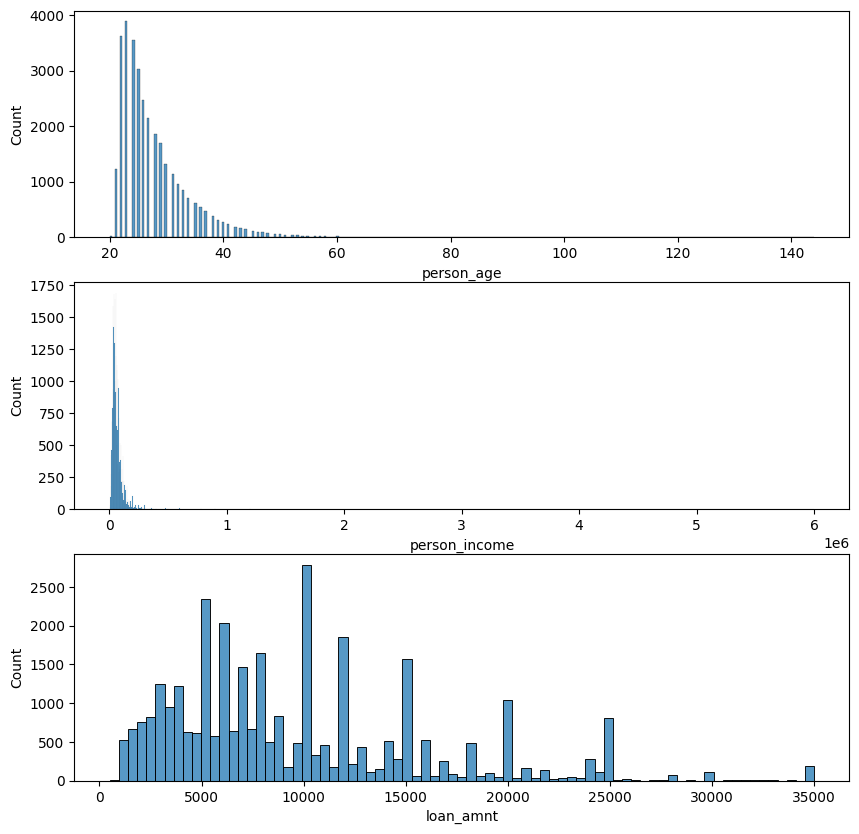

In [18]:
numerical_columns_to_plot = ['person_age', 'person_income', 'loan_amnt']
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_columns_to_plot):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=df, x=column, kde=False)

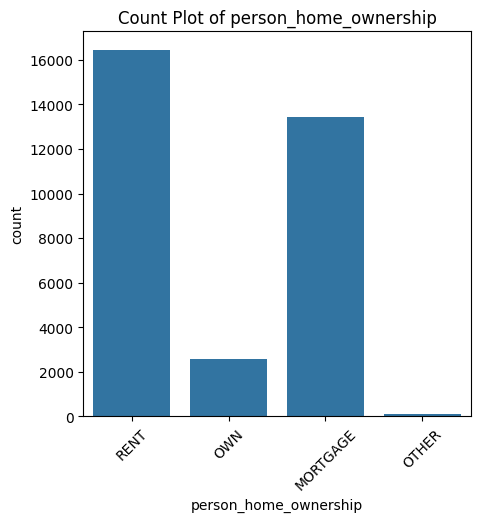

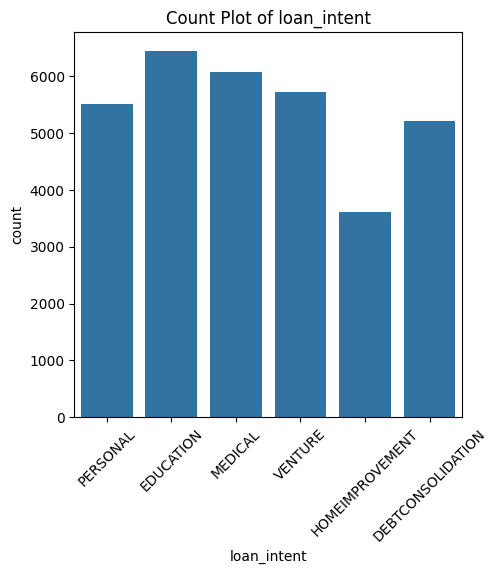

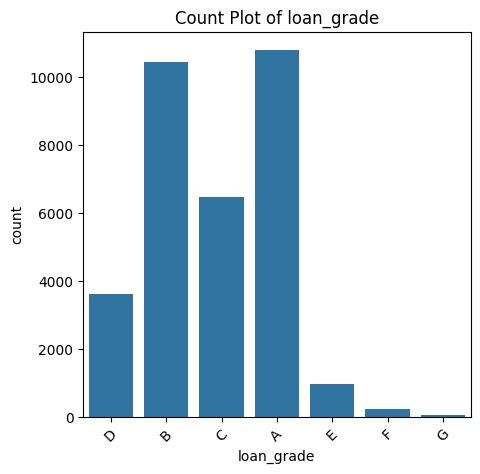

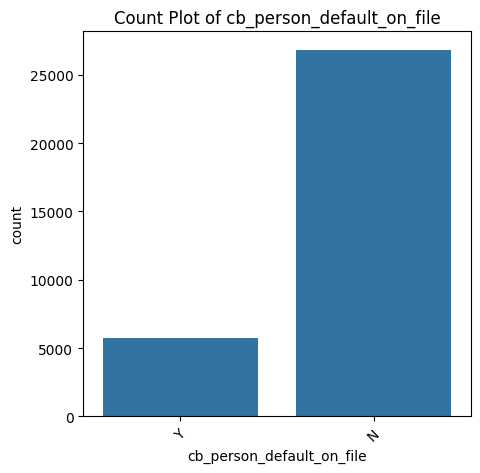

In [19]:
categorical_columns_to_plot = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for i, column in enumerate(categorical_columns_to_plot):
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    xticklabels = plt.xticks(rotation=45)

<Figure size 500x500 with 0 Axes>

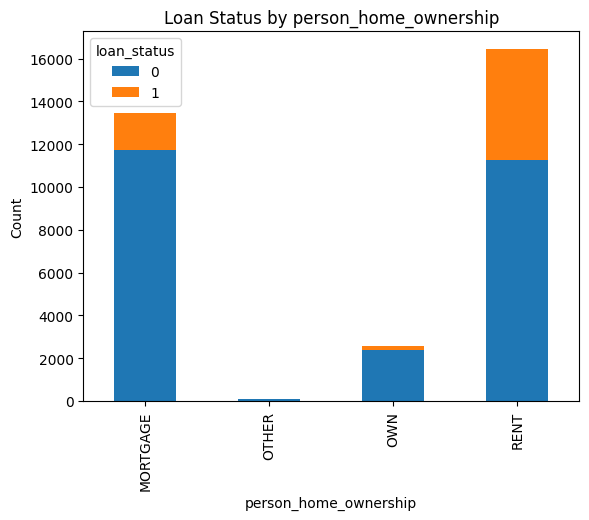

<Figure size 500x500 with 0 Axes>

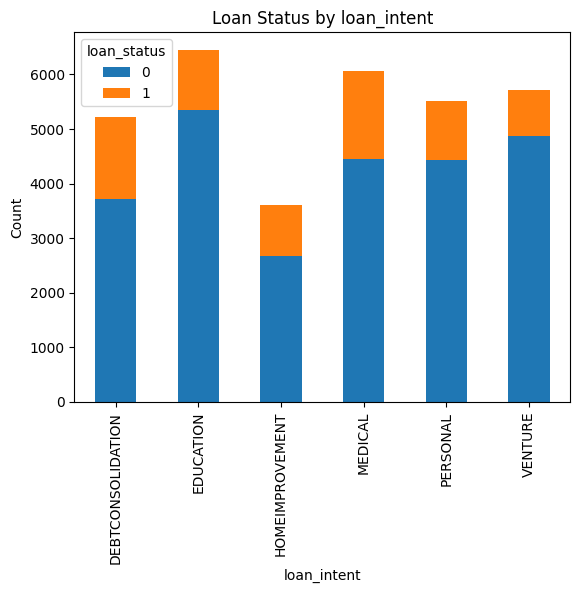

<Figure size 500x500 with 0 Axes>

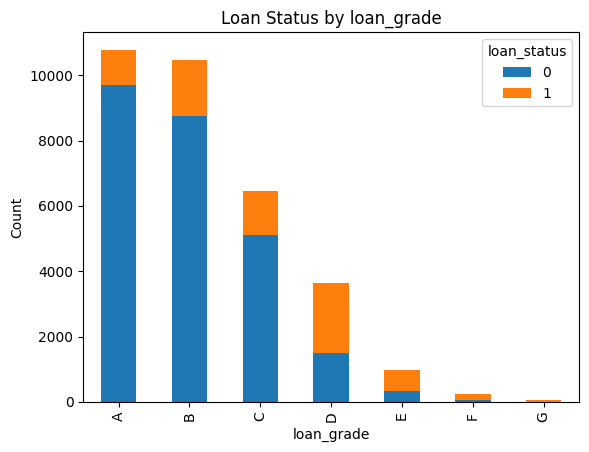

<Figure size 500x500 with 0 Axes>

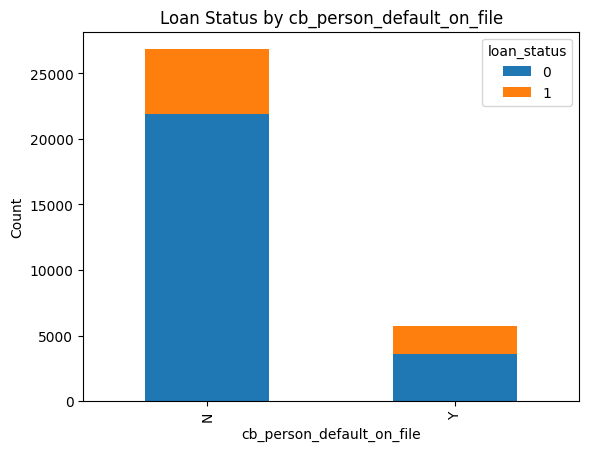

In [20]:
for column in categorical_columns_to_plot:
    plt.figure(figsize=(5, 5))
    pd.crosstab(df[column], df['loan_status']).plot(kind='bar', stacked=True)
    plt.title(f'Loan Status by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

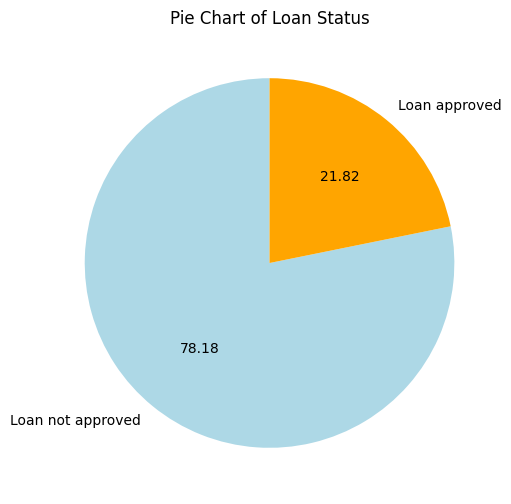

In [21]:
class_counts = df['loan_status'].value_counts().sort_index()
labels = ['Loan not approved', 'Loan approved']
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%.2f', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pie Chart of Loan Status')
plt.show()

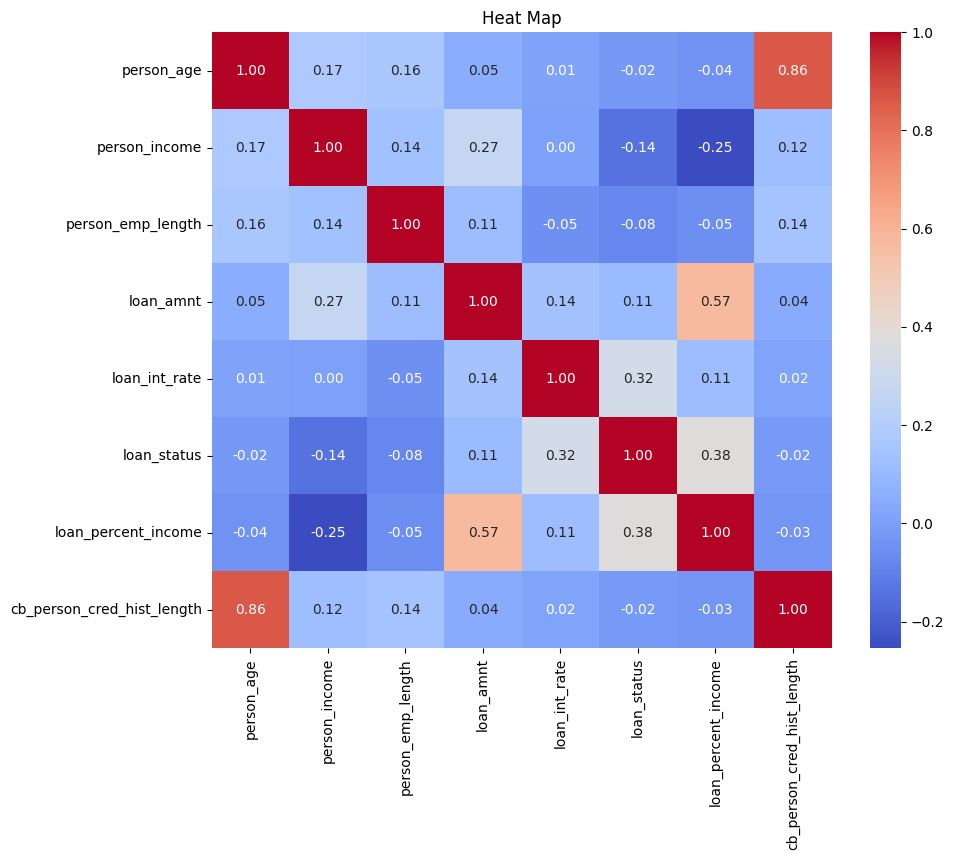

In [22]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heat Map')
plt.show()

In [23]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])

In [26]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8187816479975449


In [32]:
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.925425809421513


In [33]:
y_pred = gb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy}')

Gradient Boosting Accuracy: 0.9215896885069818
